<a href="https://colab.research.google.com/github/2303A51939/23CSBTB-27/blob/main/Colaboratory_Release_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## implemention of logistic regression with python

In [1]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

# Read CSV train data file into DataFrame

In [4]:
train_df = pd.read_csv("titanic_train.csv")

# Read CSV test data file into DataFrame

In [5]:
test_df = pd.read_csv("titanic_test.csv")

# preview train data

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
print('The number of samples into the train data is {}.'.format(train_df.shape[0]))

The number of samples into the train data is 891.


# preview test data

In [8]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
print('The number of samples into the test data is {}.'.format(test_df.shape[0]))

The number of samples into the test data is 418.


. Data Quality & Missing Value Assessment

In [10]:
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


2.1. Age - Missing Values

In [11]:
print('Percent of missing "Age" records is %.2f%%' %((train_df['Age'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Age" records is 19.87%


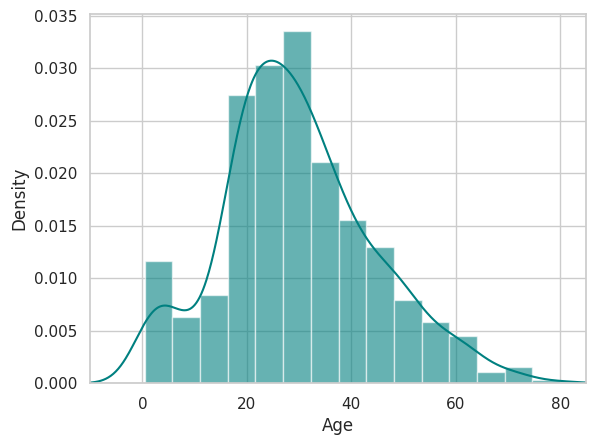

In [12]:
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()


In [13]:
print('The mean of "Age" is %.2f' %(train_df["Age"].mean(skipna=True)))
print('The median of "Age" is %.2f' %(train_df["Age"].median(skipna=True)))

The mean of "Age" is 29.70
The median of "Age" is 28.00


2.2. Cabin - Missing Values

In [14]:
print('Percent of missing "Cabin" records is %.2f%%' %((train_df['Cabin'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Cabin" records is 77.10%


2.3. Embarked - Missing Values

In [15]:
print('Percent of missing "Embarked" records is %.2f%%' %((train_df['Embarked'].isnull().sum()/train_df.shape[0])*100))

Percent of missing "Embarked" records is 0.22%


Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


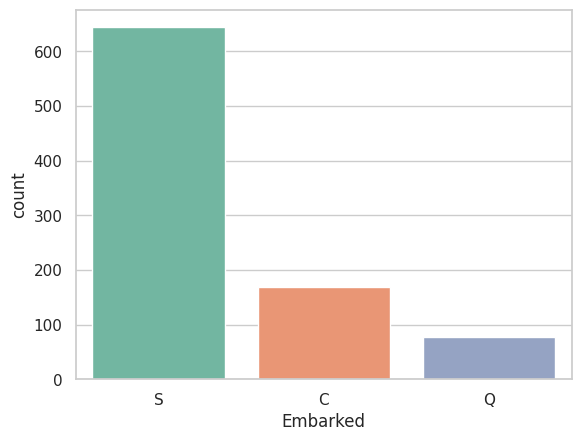

In [16]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(train_df['Embarked'].value_counts())
sns.countplot(x='Embarked', data=train_df, palette='Set2')
plt.show()

In [17]:
print('The most common boarding port of embarkation is %s.' %train_df['Embarked'].value_counts().idxmax())

The most common boarding port of embarkation is S.


In [18]:
train_data = train_df.copy()
train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)

In [19]:
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [20]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


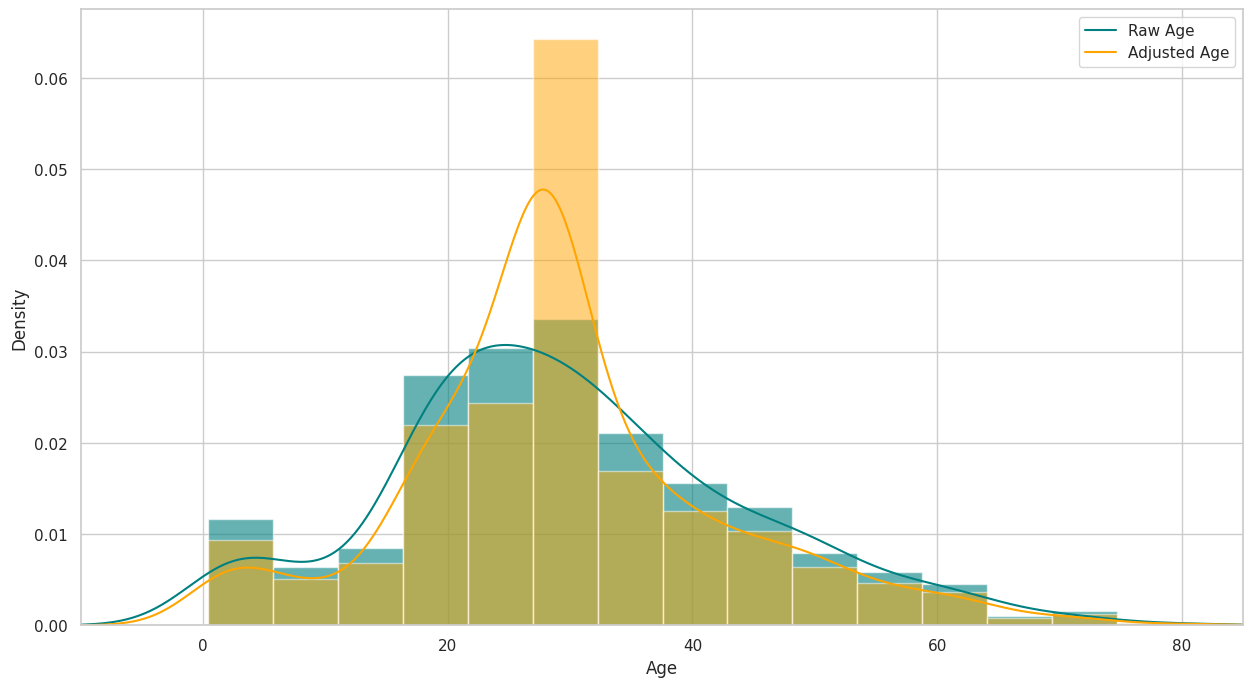

In [21]:
plt.figure(figsize=(15,8))
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
ax = train_data["Age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
train_data["Age"].plot(kind='density', color='orange')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

2.4.1. Additional Variables¶

In [22]:
train_data['TravelAlone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

In [23]:
training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

final_train = training
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,False,False,True,False,False,True,True
1,1,38.0,71.2833,0,True,False,False,True,False,False,False
2,1,26.0,7.9250,1,False,False,True,False,False,True,False
3,1,35.0,53.1000,0,True,False,False,False,False,True,False
4,0,35.0,8.0500,1,False,False,True,False,False,True,True


Now, apply the same changes to the test data.

In [24]:
test_df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [25]:
test_data = test_df.copy()
test_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
test_data["Fare"].fillna(train_df["Fare"].median(skipna=True), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

test_data['TravelAlone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)

test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

testing = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])
testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

final_test = testing
final_test.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,False,False,True,False,True,False,True
1,47.0,7.0000,0,False,False,True,False,False,True,False
2,62.0,9.6875,1,False,True,False,False,True,False,True
3,27.0,8.6625,1,False,False,True,False,False,True,True
4,22.0,12.2875,0,False,False,True,False,False,True,False


3 . Exploratory Data Analysis

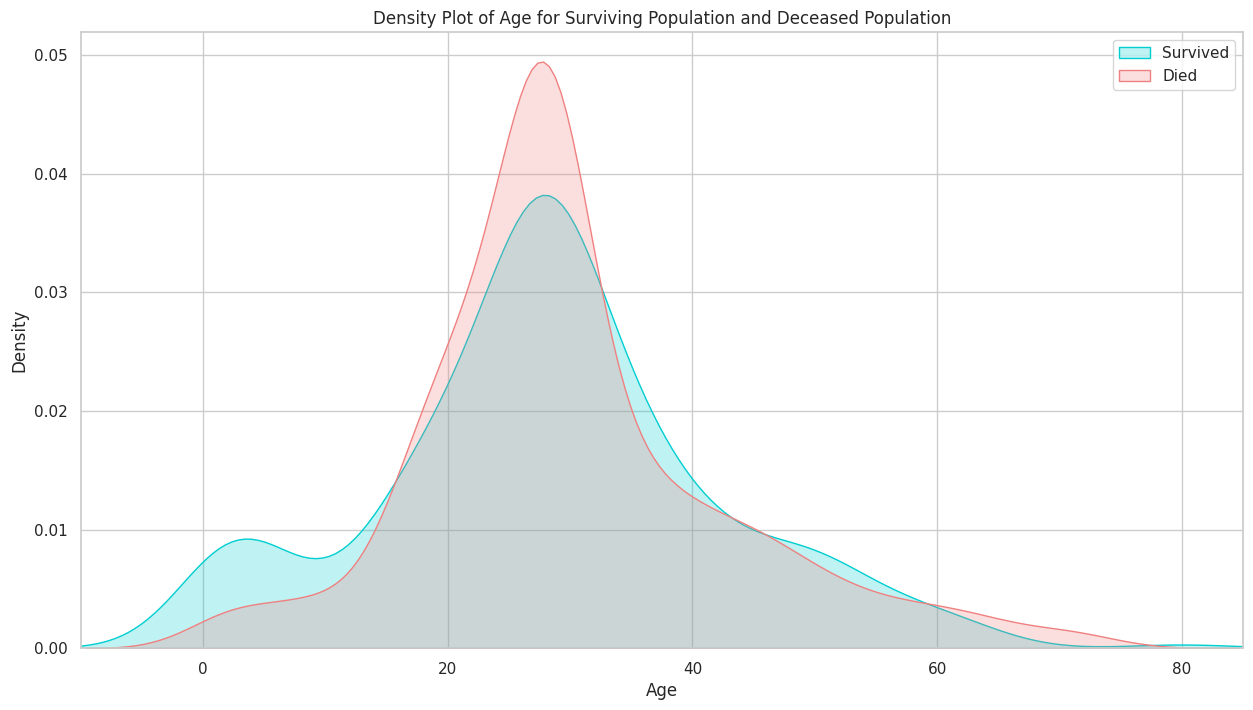

In [26]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Age"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Age"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()


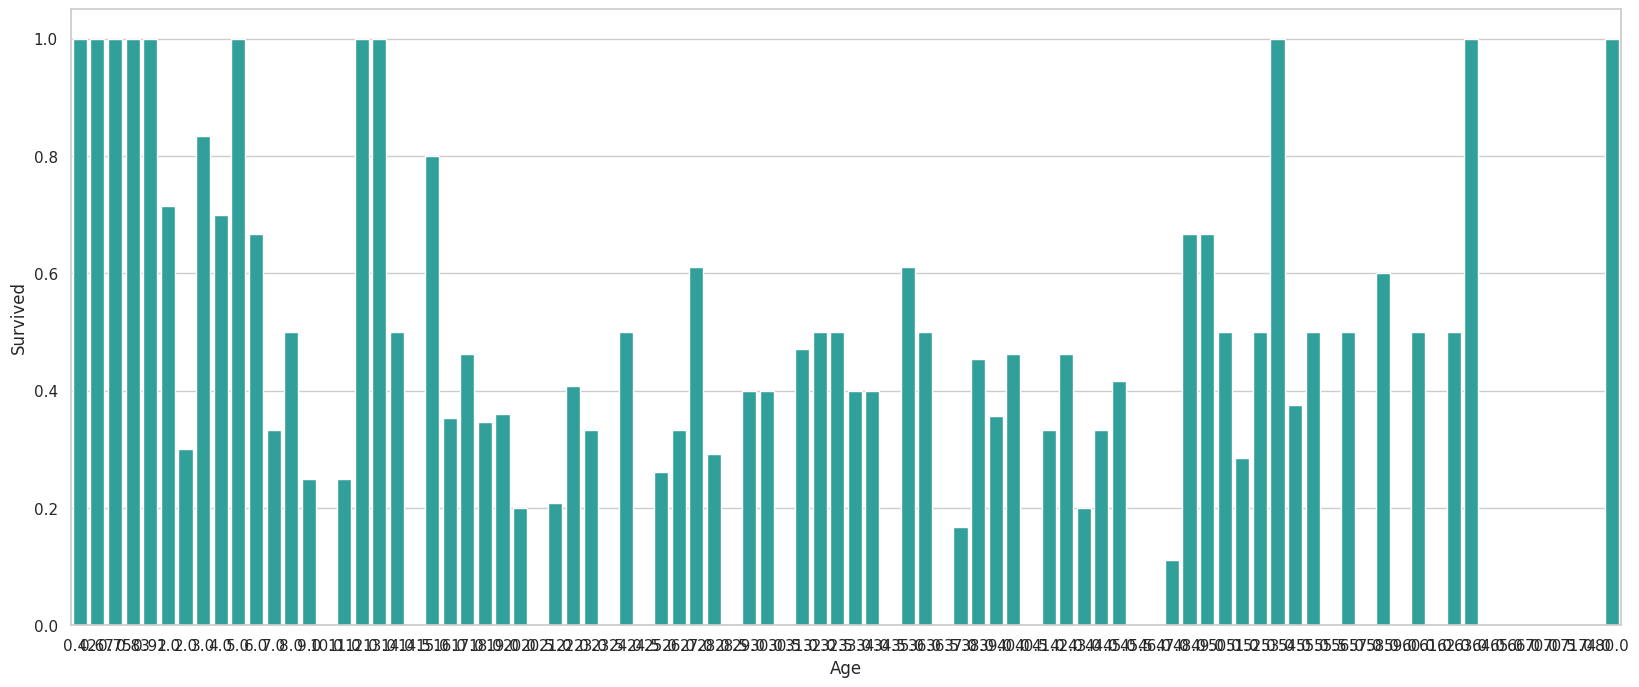

In [27]:
plt.figure(figsize=(20,8))
avg_survival_byage = final_train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="LightSeaGreen")
plt.show()

In [28]:
final_train['IsMinor']=np.where(final_train['Age']<=16, 1, 0)

final_test['IsMinor']=np.where(final_test['Age']<=16, 1, 0)

3.2. Exploration of Fare

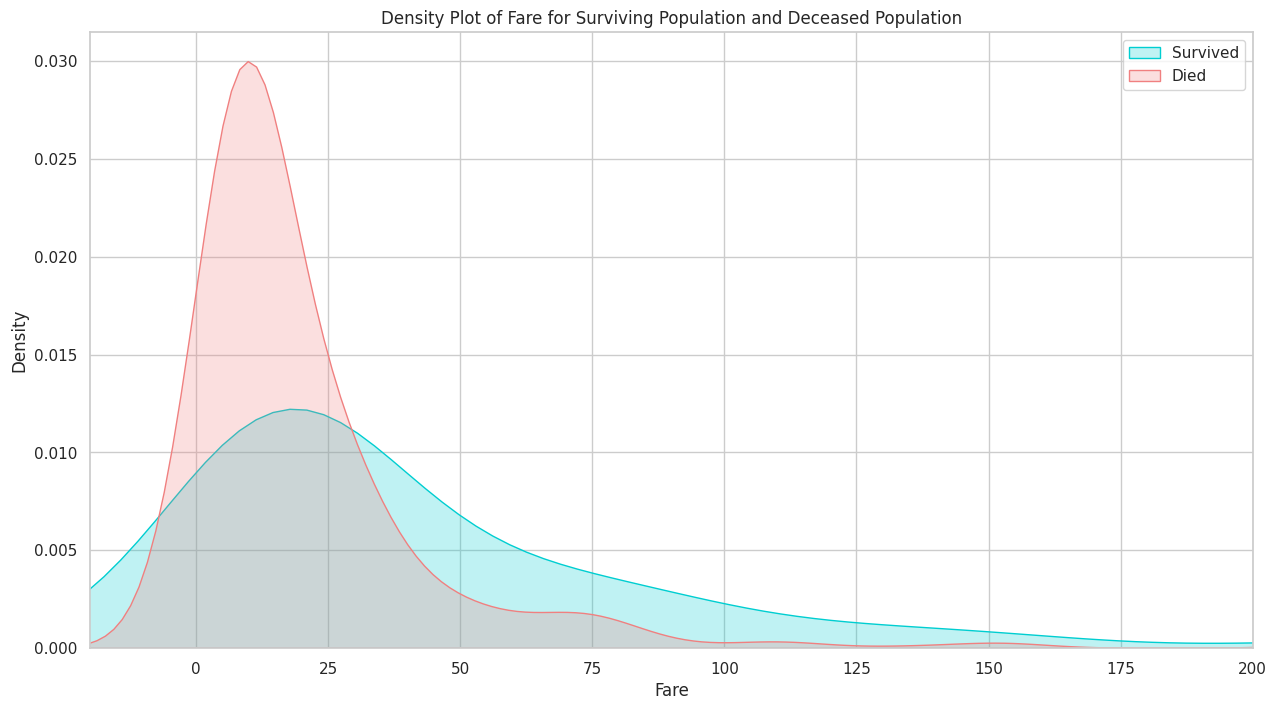

In [29]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Fare"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Fare"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

3.3. Exploration of Passenger Class

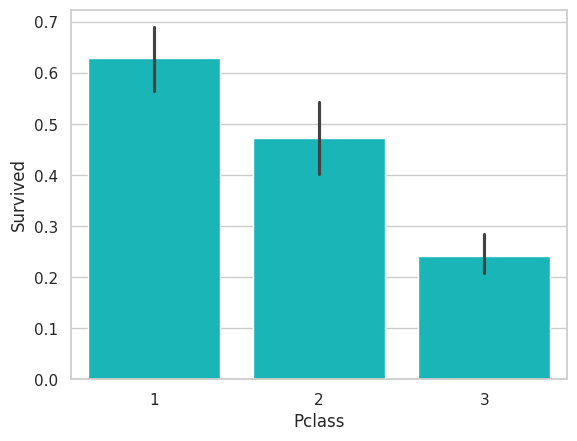

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar plot
sns.barplot(x='Pclass', y='Survived', data=train_df, color="darkturquoise")

# Show the plot
plt.show()


3.4. Exploration of Embarked Port

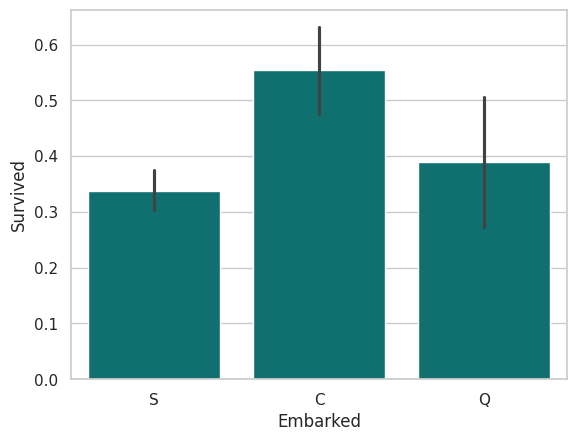

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar plot
sns.barplot(x='Embarked', y='Survived', data=train_df, color="teal")

# Show the plot
plt.show()


3.5. Exploration of Traveling Alone vs. With Family

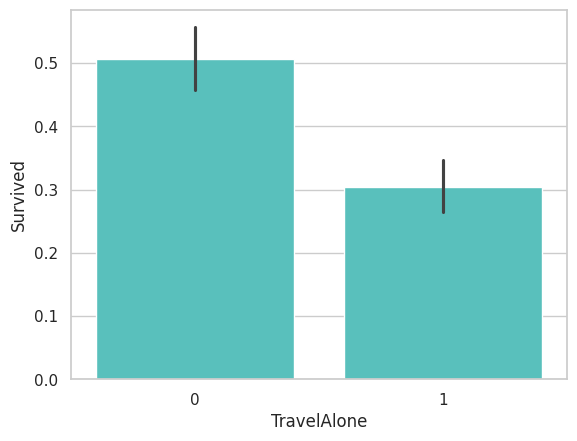

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar plot
sns.barplot(x='TravelAlone', y='Survived', data=final_train, color='mediumturquoise')

# Show the plot
plt.show()


3.6. Exploration of Gender Variable

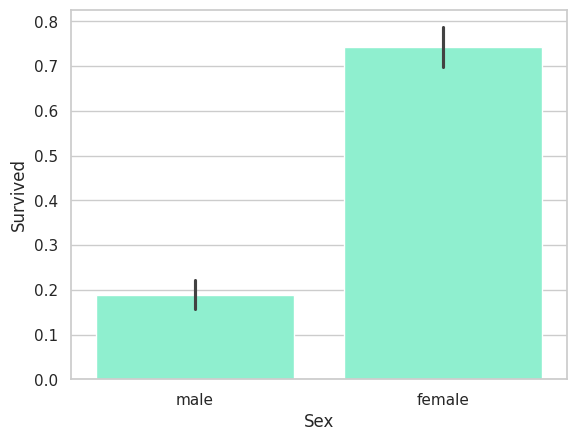

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar plot
sns.barplot(x='Sex', y='Survived', data=train_df, color='aquamarine')

# Show the plot
plt.show()


4. Logistic Regression and Results

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Define the features and target variable
cols = ["Age", "Fare", "TravelAlone", "Pclass_1", "Pclass_2", "Embarked_C", "Embarked_S", "Sex_male", "IsMinor"]
X = final_train[cols]
y = final_train['Survived']

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence warning occurs

# Initialize the RFE model and select 8 attributes
rfe = RFE(estimator=model, n_features_to_select=8)

# Fit the RFE model
rfe.fit(X, y)

# Summarize the selection of the attributes
selected_features = list(X.columns[rfe.support_])
print('Selected features: %s' % selected_features)


Selected features: ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


Optimal number of features: 9
Selected features: ['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


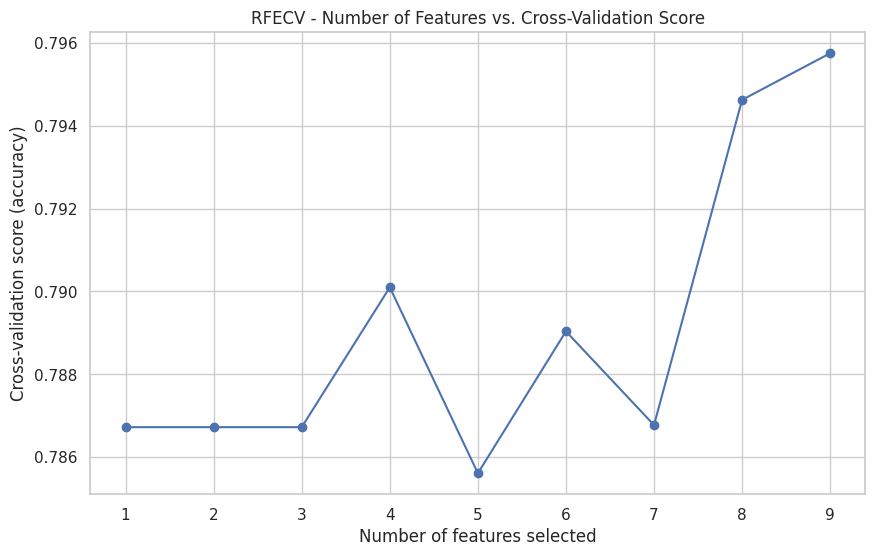

In [45]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

# Define the features and target variable
cols = ["Age", "Fare", "TravelAlone", "Pclass_1", "Pclass_2", "Embarked_C", "Embarked_S", "Sex_male", "IsMinor"]
X = final_train[cols]
y = final_train['Survived']

# Create the RFECV object
rfecv = RFECV(estimator=LogisticRegression(max_iter=1000), step=1, cv=10, scoring='accuracy')

# Fit the RFECV object
rfecv.fit(X, y)

# Print the optimal number of features and the selected features
print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features vs. cross-validation scores
plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (accuracy)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], marker='o')
plt.title("RFECV - Number of Features vs. Cross-Validation Score")
plt.show()


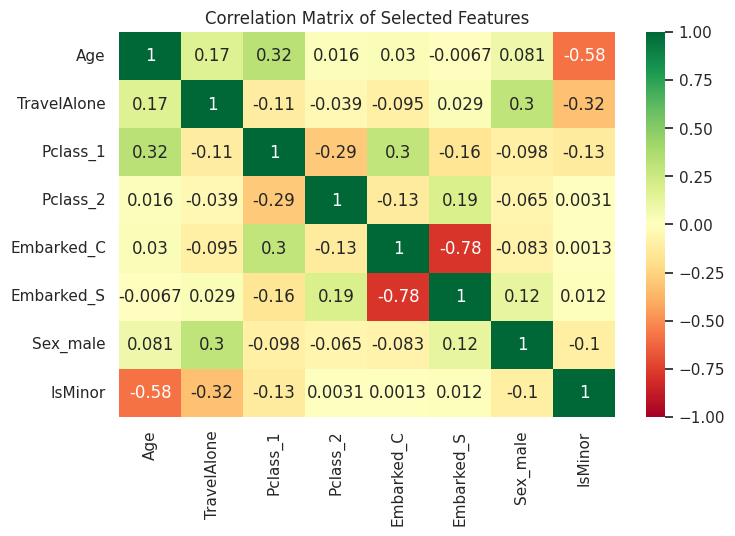

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of selected features
Selected_features = ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C',
                     'Embarked_S', 'Sex_male', 'IsMinor']

# Extract the subset of features from final_train
X = final_train[Selected_features]

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn", vmin=-1, vmax=1, center=0)
plt.title("Correlation Matrix of Selected Features")
plt.show()


4.2. Review of model evaluation procedures

Train/Test split results:
LogisticRegression accuracy is 0.782
LogisticRegression log_loss is 0.504
LogisticRegression auc is 0.838


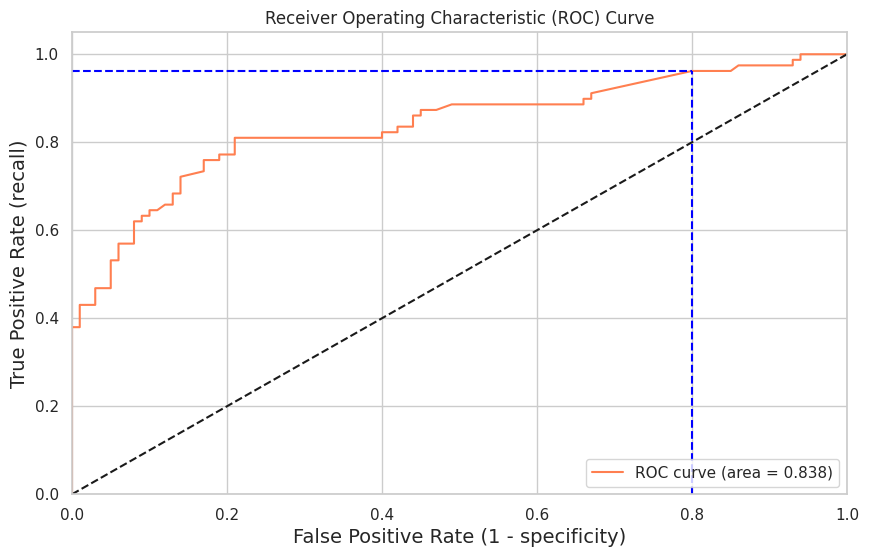

Using a threshold of 0.070 guarantees a sensitivity of 0.962 and a specificity of 0.200, i.e., a false positive rate of 80.00%.


In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, log_loss, roc_curve, auc, confusion_matrix,
                             classification_report, precision_score, recall_score)

# Define features and target variable
X = final_train[Selected_features]
y = final_train['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Initialize and fit the logistic regression model
logreg = LogisticRegression(max_iter=1000)  # Increase max_iter if needed for convergence
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Calculate metrics
fpr, tpr, thr = roc_curve(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)
log_loss_value = log_loss(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print('Train/Test split results:')
print(f"{logreg.__class__.__name__} accuracy is {accuracy:.3f}")
print(f"{logreg.__class__.__name__} log_loss is {log_loss_value:.3f}")
print(f"{logreg.__class__.__name__} auc is {roc_auc:.3f}")

# Find the index for a threshold with sensitivity > 0.95
idx = np.min(np.where(tpr > 0.95))  # index of the first threshold for which the recall > 0.95

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='coral', label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx], fpr[idx]], [0, tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print threshold information
print(f"Using a threshold of {thr[idx]:.3f} guarantees a sensitivity of {tpr[idx]:.3f} "
      f"and a specificity of {1 - fpr[idx]:.3f}, i.e., a false positive rate of {fpr[idx] * 100:.2f}%.")


4.2.2. Model evaluation based on K-fold cross-validation using cross_val_score() function

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Initialize logistic regression model
logreg = LogisticRegression(max_iter=1000)  # Increase max_iter if needed for convergence

# Perform 10-fold cross-validation
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')

# Print cross-validation results
print('K-fold cross-validation results:')
print(f"{logreg.__class__.__name__} average accuracy is {scores_accuracy.mean():.3f}")
print(f"{logreg.__class__.__name__} average log_loss is {-scores_log_loss.mean():.3f}")  # Negate log_loss since it is returned as negative
print(f"{logreg.__class__.__name__} average AUC is {scores_auc.mean():.3f}")


K-fold cross-validation results:
LogisticRegression average accuracy is 0.796
LogisticRegression average log_loss is 0.454
LogisticRegression average AUC is 0.850


4.2.3. Model evaluation based on K-fold cross-validation using cross_validate() function

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

# Define the scoring metrics
scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

# Initialize the logistic regression model
modelCV = LogisticRegression(max_iter=1000)  # Increase max_iter if needed for convergence

# Perform cross-validation
results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()), return_train_score=False)

# Print cross-validation results
print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    metric = list(scoring.keys())[sc]
    score_name = list(scoring.values())[sc]
    if score_name == 'neg_log_loss':
        # Negate the log_loss to get the positive value
        score = -results['test_%s' % score_name].mean()
        std_dev = results['test_%s' % score_name].std()
    else:
        score = results['test_%s' % score_name].mean()
        std_dev = results['test_%s' % score_name].std()

    print(f"{modelCV.__class__.__name__} average {metric}: {score:.3f} (+/- {std_dev:.3f})")


K-fold cross-validation results:
LogisticRegression average accuracy: 0.796 (+/- 0.024)
LogisticRegression average log_loss: 0.454 (+/- 0.037)
LogisticRegression average auc: 0.850 (+/- 0.028)


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

# Define features and target variable
cols = ["Age", "Fare", "TravelAlone", "Pclass_1", "Pclass_2", "Embarked_C", "Embarked_S", "Sex_male", "IsMinor"]
X = final_train[cols]
y = final_train['Survived']  # Make sure 'Survived' is correctly referenced

# Define scoring metrics
scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

# Initialize the logistic regression model
modelCV = LogisticRegression(max_iter=1000)  # Increase max_iter if needed for convergence

# Perform cross-validation
results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()), return_train_score=False)

# Print cross-validation results
print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    metric = list(scoring.keys())[sc]
    score_name = list(scoring.values())[sc]
    if score_name == 'neg_log_loss':
        # Negate the log_loss to get the positive value
        score = -results['test_%s' % score_name].mean()
        std_dev = results['test_%s' % score_name].std()
    else:
        score = results['test_%s' % score_name].mean()
        std_dev = results['test_%s' % score_name].std()

    print(f"{modelCV.__class__.__name__} average {metric}: {score:.3f} (+/- {std_dev:.3f})")


K-fold cross-validation results:
LogisticRegression average accuracy: 0.796 (+/- 0.026)
LogisticRegression average log_loss: 0.455 (+/- 0.037)
LogisticRegression average auc: 0.849 (+/- 0.028)


4.3. GridSearchCV evaluating using multiple scorers simultaneously

Best estimator: LogisticRegression(C=2.4000100000000004, max_iter=1000)
Best parameters: {'C': 2.4000100000000004}
Best score: 0.8069662921348316


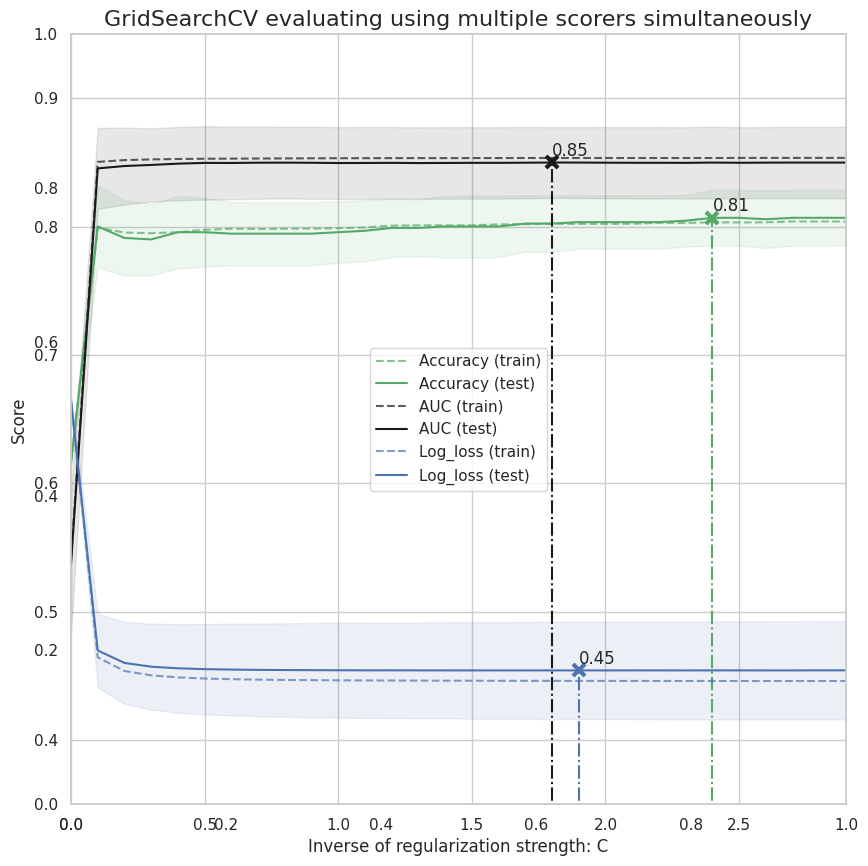

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define features and target variable
X = final_train[Selected_features]
y = final_train['Survived']

# Define parameter grid and scoring metrics
param_grid = {'C': np.arange(1e-05, 3, 0.1)}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

# Initialize GridSearchCV
gs = GridSearchCV(LogisticRegression(max_iter=1000),  # Ensure model converges
                  param_grid=param_grid,
                  scoring=scoring,
                  cv=10,
                  refit='Accuracy',
                  return_train_score=True)

# Fit the GridSearchCV
gs.fit(X, y)
results = gs.cv_results_

# Print best parameters and scores
print('='*20)
print("Best estimator:", gs.best_estimator_)
print("Best parameters:", gs.best_params_)
print("Best score:", gs.best_score_)
print('='*20)

# Plot results
plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously", fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, param_grid['C'].max())
ax.set_ylim(0.35, 0.95)

# Convert MaskedArray to regular numpy array
X_axis = np.array(results['param_C'].data, dtype=float)

# Plot the results for each scorer
for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer] == 'neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std, sample_score_mean + sample_score_std, alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color, alpha=1 if sample == 'test' else 0.7, label="%s (%s)" % (scorer, sample))

    # Identify and plot the best score for each scorer
    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer] == 'neg_log_loss' else results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index]] * 2, [0, best_score], linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score, (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()


4.4. GridSearchCV evaluating using multiple scorers, RepeatedStratifiedKFold and pipeline for preprocessing simultaneously

Best estimator: Pipeline(steps=[('scale', StandardScaler(with_mean=False, with_std=False)),
                ('clf', LogisticRegression(C=4.90001, max_iter=1000))])
Best parameters: {'clf__C': 4.90001}
Best score: 0.7993258426966291


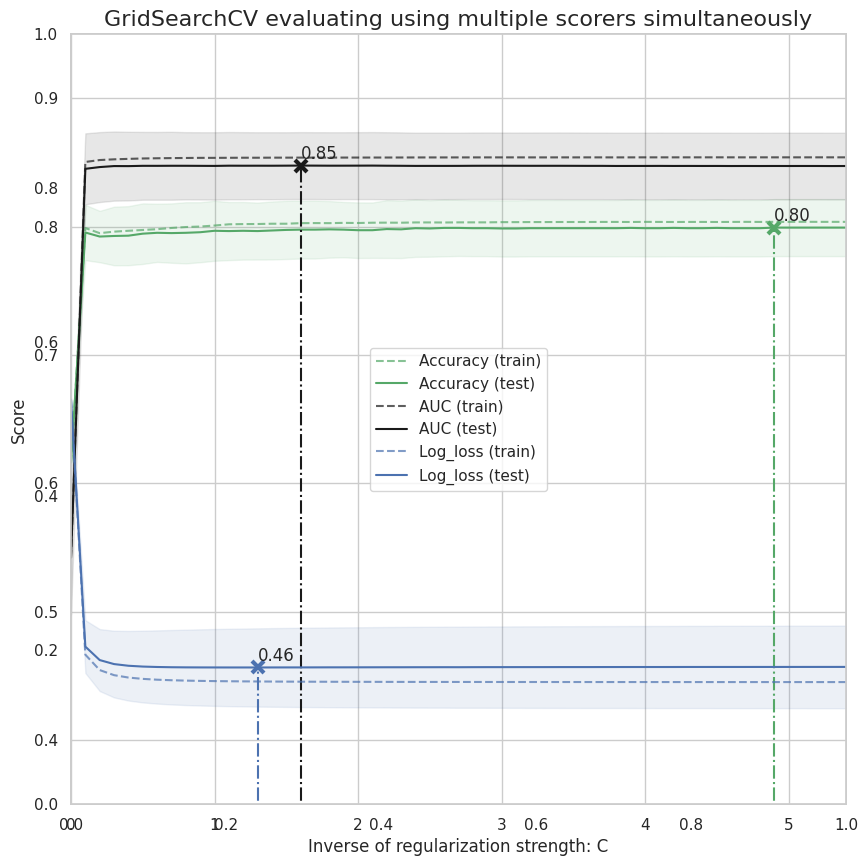

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

# Define features and target variable
X = final_train[Selected_features]
y = final_train['Survived']

# Define regularization strength values
C = np.arange(1e-05, 5.5, 0.1)
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

# Initialize logistic regression model
log_reg = LogisticRegression(max_iter=1000)  # Ensure convergence

# Define standard scaler (mean and std scaling turned off as per your choice)
std_scale = StandardScaler(with_mean=False, with_std=False)  # Adjust as needed

# Define the cross-validation method: Repeated Stratified K-Fold
n_folds = 5
n_repeats = 5
rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=2)

# Create a pipeline with scaling and logistic regression
log_clf_pipe = Pipeline(steps=[('scale', std_scale), ('clf', log_reg)])

# Define grid search with the pipeline
log_clf = GridSearchCV(estimator=log_clf_pipe, param_grid={'clf__C': C},
                       scoring=scoring, cv=rskfold, return_train_score=True,
                       refit='Accuracy')

# Fit the grid search
log_clf.fit(X, y)
results = log_clf.cv_results_

# Print best parameters and scores
print('='*20)
print("Best estimator:", log_clf.best_estimator_)
print("Best parameters:", log_clf.best_params_)
print("Best score:", log_clf.best_score_)
print('='*20)

# Plot the results
plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously", fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, C.max())
ax.set_ylim(0.35, 0.95)

# Convert MaskedArray to regular numpy array
X_axis = np.array(results['param_clf__C'].data, dtype=float)

# Plot results for each scorer
for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer] == 'neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std, sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    # Find and plot the best score for each scorer
    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer] == 'neg_log_loss' else results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer
    ax.plot([X_axis[best_index]] * 2, [0, best_score], linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score, (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()


In [53]:
final_test['Survived'] = log_clf.predict(final_test[Selected_features])
final_test['PassengerId'] = test_df['PassengerId']

submission = final_test[['PassengerId','Survived']]

submission.to_csv("submission.csv", index=False)

submission.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0
